# Bitcoin Analysis
## Attempt to determine the direction of crypto asset movement based on selected market information as well as to identify if there are leading indicators that could point the direction of movement. 
### Data obtained from [Coinmetrics](https://docs.coinmetrics.io/api/) API 

In [20]:
import os
import matplotlib 
import matplotlib.pyplot as plt
import json
import datetime as dt
from datetime import datetime
from coinmetrics.api_client import CoinMetricsClient
import pandas as pd
import numpy as np
%matplotlib inline

In [21]:
# Obtain data by specifying coin and data needed
client = CoinMetricsClient()
btc_metrics = client.get_asset_metrics(assets='btc',metrics=['PriceUSD','AdrActCnt','CapMrktCurUSD','NVTAdj','VelCur1yr','TxCnt','TxTfrValAdjUSD','SplyCur'],start_time='2021-02-01',frequency='1d')
btc_metrics = pd.DataFrame(btc_metrics)
btc_metrics['time'] = pd.to_datetime(btc_metrics['time'])
btc_metrics = btc_metrics.set_index('time')

In [22]:
# Select coin metrics from Coinmetrics API and convert to float
btc_metrics = btc_metrics[['PriceUSD','CapMrktCurUSD','NVTAdj','VelCur1yr','AdrActCnt','TxCnt','TxTfrValAdjUSD','SplyCur']].astype('float').round(2)
btc_metrics.tail()

,PriceUSD,CapMrktCurUSD,NVTAdj,VelCur1yr,AdrActCnt,TxCnt,TxTfrValAdjUSD,SplyCur
time,,,,,,,,
2021-06-20 00:00:00+00:00,35599.94,6.671216e+11,107.72,11.52,652470.0,168027.0,6.193330e+09,18739400.04
2021-06-21 00:00:00+00:00,31715.16,5.943439e+11,45.96,11.52,835557.0,208474.0,1.293179e+10,18740056.29
2021-06-22 00:00:00+00:00,32394.56,6.070942e+11,53.22,11.56,776432.0,196802.0,1.140786e+10,18740625.04
2021-06-23 00:00:00+00:00,33610.50,6.299029e+11,54.12,11.56,847730.0,233460.0,1.163983e+10,18741256.29
2021-06-24 00:00:00+00:00,34658.97,NaN,NaN,11.53,NaN,226845.0,1.060661e+10,18741912.54


## Historical Prices

<AxesSubplot:title={'center':'BTC Price'}, xlabel='time', ylabel='BTC Price ($)'>

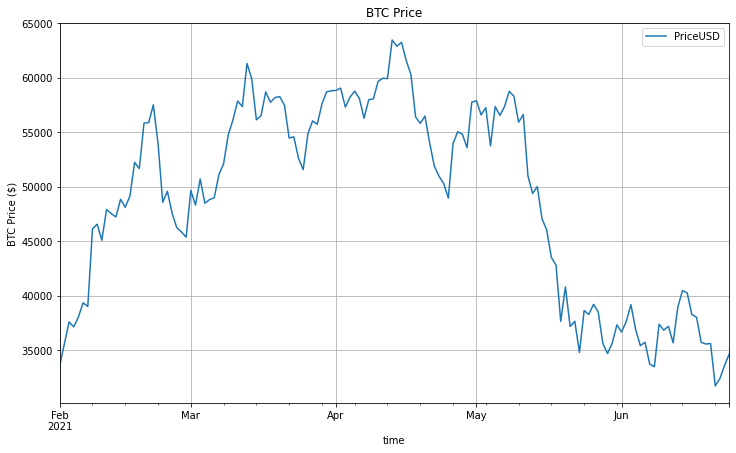

In [23]:
# Obtain BTC historical prices in USD
btc_price = btc_metrics[['PriceUSD']]
btc_price.plot(figsize= (12,7), grid=True, title="BTC Price",ylabel='BTC Price ($)')

## EMA

<AxesSubplot:title={'center':'EMA BTC'}, xlabel='time', ylabel='BTC Price ($)'>

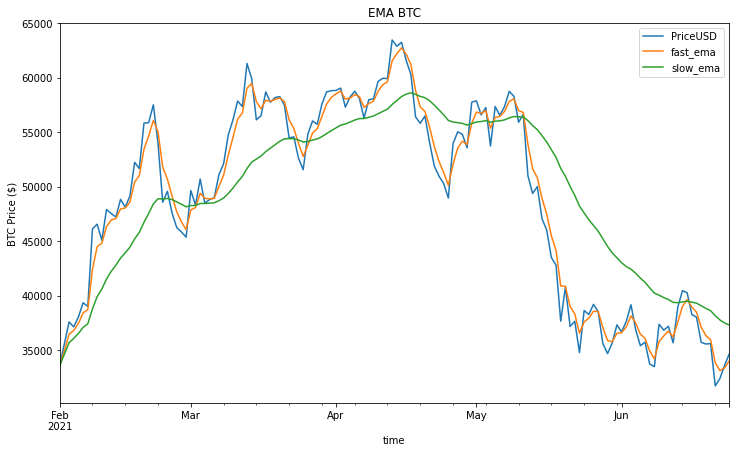

In [24]:
# Set short and long windows for EMA (Exponential Moving Average)
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_metrics['fast_ema'] = btc_metrics['PriceUSD'].ewm(halflife=short_window).mean()
btc_metrics['slow_ema'] = btc_metrics['PriceUSD'].ewm(halflife=long_window).mean()

# Plot the EMA of BTC closing prices
btc_metrics[['PriceUSD', 'fast_ema', 'slow_ema']].plot(figsize=(12,7), title='EMA BTC', ylabel='BTC Price ($)') 

In [25]:
# A bullish crossover occurs when the fast EMA (1-day) crosses above a slow EMA (10-day). Bearish signal is opposite, when fast EMA crosses below slow EMA

## Velocity

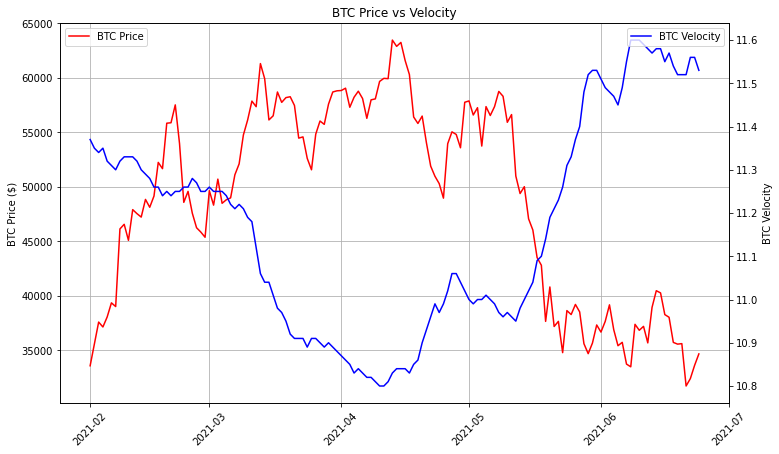

In [26]:
# Plot coin velocity vs coin price (velocity has inverse correlation with coin price)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(btc_metrics['PriceUSD'], label ='BTC Price', color='r')
ax.set_ylabel('BTC Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(btc_metrics['VelCur1yr'], label='BTC Velocity', color='b')
ax.set_title('BTC Price vs Velocity')
ax2.set_ylabel('BTC Velocity') 
ax2.legend(loc='upper right')

In [27]:
# Note inverse relationship between the coin price and velocity

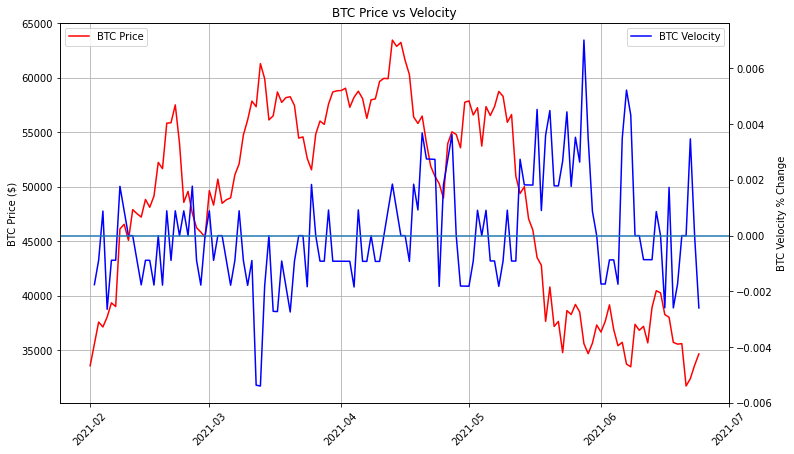

In [28]:
# Plot % Velocity change
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(btc_metrics['PriceUSD'], label ='BTC Price', color='r')
ax.set_ylabel('BTC Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(btc_metrics['VelCur1yr'].pct_change().dropna(), label='BTC Velocity', color='b')
ax.set_title('BTC Price vs Velocity')
ax2.set_ylabel('BTC Velocity % Change') 
ax2.legend(loc='upper right')
plt.axhline(0)

In [29]:
# Velocity is inversly correlated with coin price movement. Note the change (increase) in velocity before the correction.

## NVT - Network Value to Transaction

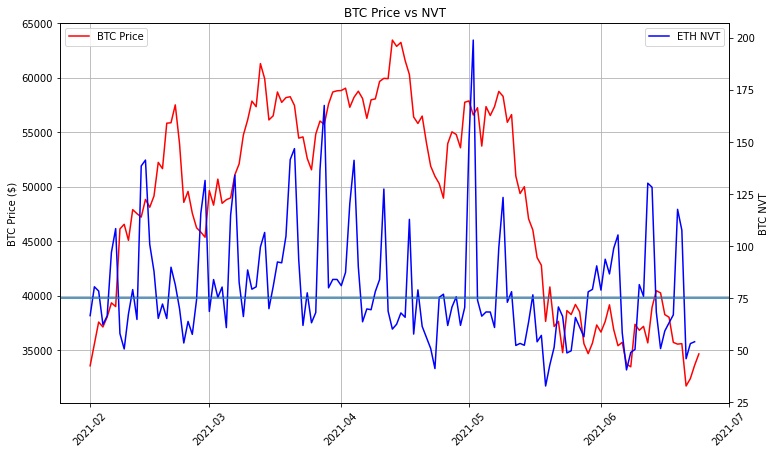

In [30]:
# Plot coin NVT - Network Value to Transaction (NVT) Ratio describes the relationship between market cap and transfer volumes (it is equivalent to P/E ratio)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(btc_metrics['PriceUSD'], label ='BTC Price', color='r')
ax.set_ylabel('BTC Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(btc_metrics['NVTAdj'], label='ETH NVT', color='b')
ax.set_title('BTC Price vs NVT')
ax2.set_ylabel('BTC NVT') 
ax2.legend(loc='upper right')
plt.axhline(75)

In [31]:
# It appears that NVT of approx. 75 was maintaining a balance between the network value growth and transaction volume growth. 
# NVT increase occurs when transactions are growing at a slower rate than the market cap, indicating that the network is over-valued thus signaling bear market.
# NVT decrease occurs when transaction volumes are outpacing the market cap increase, suggesting that the network is under-valued signaling bull market

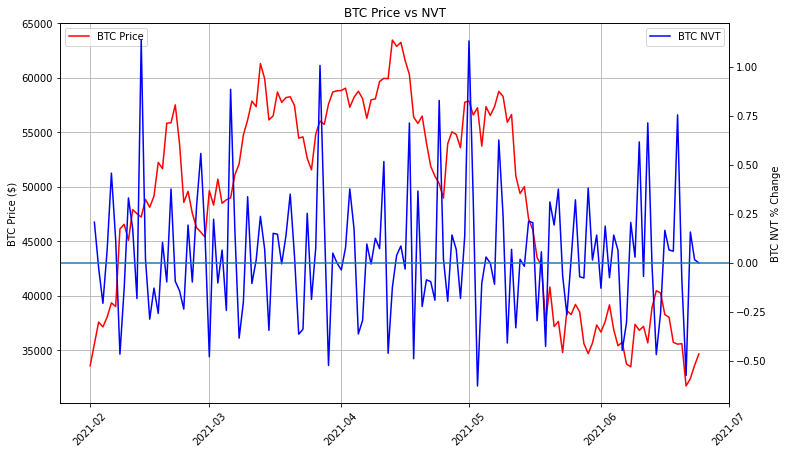

In [32]:
# Plot % NVT Change 
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(btc_metrics['PriceUSD'],label ='BTC Price', color='r')
ax.set_ylabel('BTC Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(btc_metrics['NVTAdj'].pct_change().dropna(), label='BTC NVT', color='b')
ax.set_title('BTC Price vs NVT')
ax2.set_ylabel('BTC NVT % Change') 
ax2.legend(loc='upper right')
plt.axhline(0)

## Transaction Count

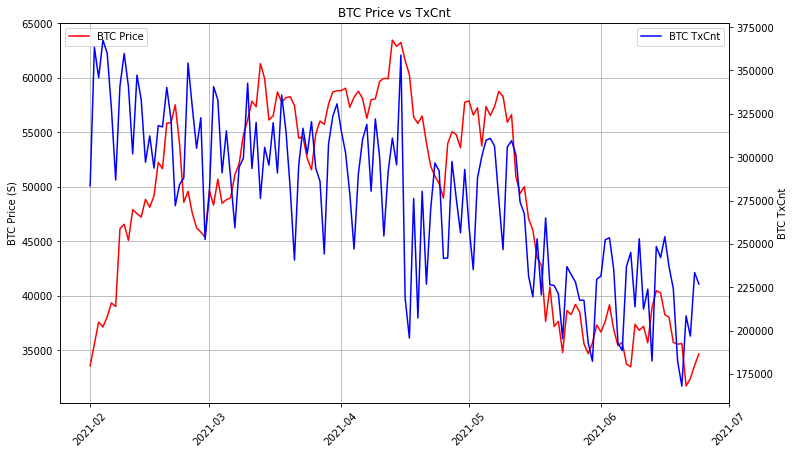

In [33]:
# Plot Tx Count change
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(btc_metrics['PriceUSD'],label ='BTC Price', color='r')
ax.set_ylabel('BTC Price (S)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(btc_metrics['TxCnt'], label='BTC TxCnt', color='b')
ax.set_title('BTC Price vs TxCnt')
ax2.set_ylabel('BTC TxCnt') 
ax2.legend(loc='upper right')

In [34]:
# Note the drop in transaction count before the correction

## Transaction Volume

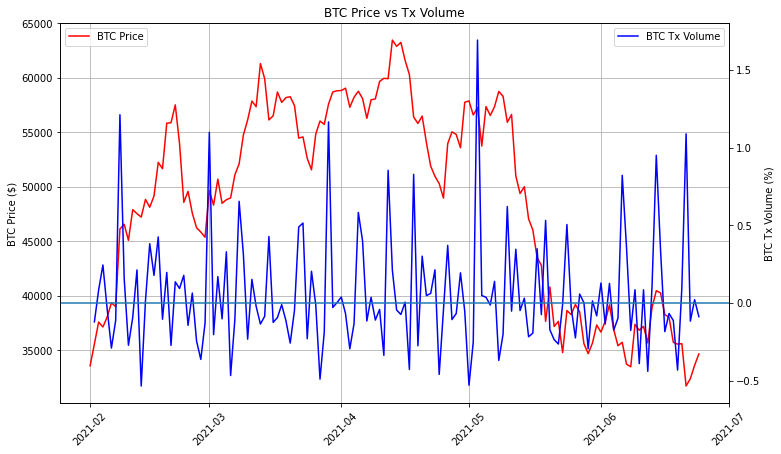

In [35]:
# Plot Tx Volume % change
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(btc_metrics['PriceUSD'],label ='BTC Price', color='r')
ax.set_ylabel('BTC Price ($)')
plt.xticks(rotation=45)
ax.legend(loc='upper left')
plt.grid()

ax2 = ax.twinx()
plt.plot(btc_metrics['TxTfrValAdjUSD'].pct_change().dropna(), label='BTC Tx Volume', color='b')
ax.set_title('BTC Price vs Tx Volume')
ax2.set_ylabel('BTC Tx Volume (%)') 
ax2.legend(loc='upper right')
plt.axhline(0)

In [36]:
# Sharp spike in transaction volume may indicate that the coin was overbought and ready for correction that happened soon afterwards. 

In [37]:
btc_metrics.to_csv('resources/btc_metrics.csv')